# Homework 4

### Armaan 906310394

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm


In [23]:
estimation_data = pd.read_excel('prospectscoringhw.xlsx', sheet_name = 'Estimation_data')
holdout_data = pd.read_excel('prospectscoringhw.xlsx', sheet_name = 'Holdout_data')

In [24]:
holdout_data

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y
0,0,158,57,70,63,0,13,0,1
1,1,187,57,70,63,0,0,29,0
2,1,313,57,45,63,0,0,0,0
3,1,310,57,70,63,0,0,14,1
4,0,37,48,70,63,0,0,0,1
...,...,...,...,...,...,...,...,...,...
295,1,141,57,55,63,0,13,0,0
296,0,232,48,50,26,0,26,14,0
297,0,302,57,70,63,0,0,14,1
298,0,84,42,70,63,0,0,0,0


In [25]:
estimation_data

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y
0,1,302,57,70,63,0,0,0,1
1,0,221,57,60,37,12,26,14,0
2,0,202,48,25,63,0,13,14,0
3,1,148,57,55,63,0,0,0,0
4,0,43,57,55,63,0,0,0,0
...,...,...,...,...,...,...,...,...,...
195,1,252,48,70,52,0,13,14,1
196,0,326,24,60,63,12,26,0,0
197,0,79,57,70,63,0,0,0,1
198,1,227,57,55,63,12,0,0,0


In [26]:
#Bifurcating x and y columns for regression
X_estimation = estimation_data.iloc[:,:-1]
Y_estimation = estimation_data.loc[:,'y']

X_holdout = holdout_data.iloc[:,:-1]
Y_holdout = pd.DataFrame(holdout_data.loc[:,'y'])

**Q1. Run a logistic regression on the estimation list of 200 persons predicting y as a function
of gender and the seven hotline variables and the intercept (constant) term. Do not eliminate coefficients which appear statistically insignificant.**

In [32]:
logit_model = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=1000)
logit_model.fit(X_estimation, Y_estimation)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [33]:
estimation_betas = logit_model.coef_
estimation_intercept = logit_model.intercept_

In [54]:
print(f'beta_0 = {round(estimation_intercept[0],4)}')
for i in range(1,9):
    print(f'beta_{i} = {round(estimation_betas[0][i-1],4)}')

beta_0 = -10.2924
beta_1 = -0.0424
beta_2 = 0.0059
beta_3 = 0.0434
beta_4 = 0.0695
beta_5 = 0.0337
beta_6 = 0.0089
beta_7 = -0.001
beta_8 = -0.0009


The final equation is: 
$t= -10.2924 - 0.0424 Gender + 0.059 FrequencyFoodWebsites + 0.0434 FrequencyTravelWebsites + 0.0695 RestaurantExp + 0.0337 TravelExp + 0.0089 EntertainmentExp - 0.0001 Income - 0.0009Ethnicity$

**Q2.Evaluate the score function for each person in the holdout list of 300 persons. Based on
this, compute the following for each person: (1) the predicted response probability r, (2)
the consequent lift, which is obtained by dividing the predicted response probability by
the average response rate in the estimation list.**

In [35]:
def scoring(j):
    intercept = estimation_intercept[0]
    coefficients = estimation_betas[0][:]

# Extract predictor variables for the j-th observation
    predictors = scoring_list.iloc[j, :]

# Calculate the linear combination of predictors and coefficients
    dot_product = sum(x * y for x, y in zip(predictors, coefficients))

# Add intercept to the linear combination
    t = intercept + dot_product
    r = np.exp(t)/(1+np.exp(t))
    lift = r/estimation_average_y
    return t,r,lift

In [37]:
scoring_list = pd.DataFrame(X_holdout)
estimation_average_y = np.mean(Y_estimation) # average response rate 

for i in range(len(scoring_list)):
    scoring_list.loc[i, 'Score'], scoring_list.loc[i, 'r'], scoring_list.loc[i, 'Lift'] = scoring(i)

scoring_list

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,Score,r,Lift
0,0,158,57,70,63,0,13,0,0.098137,0.524514,1.456985
1,1,187,57,70,63,0,0,29,0.215169,0.553586,1.537738
2,1,313,57,45,63,0,0,0,-0.749980,0.320826,0.891182
3,1,310,57,70,63,0,0,14,0.958438,0.722809,2.007802
4,0,37,48,70,63,0,0,0,-0.998211,0.269293,0.748037
...,...,...,...,...,...,...,...,...,...,...,...
295,1,141,57,55,63,0,13,0,-1.088221,0.251953,0.699871
296,0,232,48,50,26,0,26,14,-2.516293,0.074724,0.207566
297,0,302,57,70,63,0,0,14,0.953358,0.721790,2.004972
298,0,84,42,70,63,0,0,0,-0.979345,0.273022,0.758394


**Q3. Sort all the 300 persons in the holdout list in decreasing order of lift as is done in slide
30.**

In [38]:
scoring_list = scoring_list.sort_values(by='Lift', ascending=False)
scoring_list

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,Score,r,Lift
131,1,317,57,70,63,12,26,0,1.094448,0.749218,2.081162
243,0,321,57,70,63,0,28,0,1.051670,0.741095,2.058599
191,0,315,57,70,63,0,0,14,1.030543,0.737021,2.047281
159,0,311,57,70,63,0,0,0,1.018904,0.734759,2.040997
19,1,314,57,70,63,0,0,0,0.994297,0.729936,2.027600
...,...,...,...,...,...,...,...,...,...,...,...
211,0,406,39,0,63,0,26,0,-4.089672,0.016469,0.045747
152,0,291,39,10,52,0,0,28,-4.447783,0.011569,0.032136
96,0,159,57,15,41,0,26,0,-4.474904,0.011263,0.031286
285,1,354,30,10,52,0,0,0,-4.482211,0.011182,0.031061


**Q4. Plot the curve for marginal response rate vs number of solicitations made, like in the
chart that appears on slide 31. The “marginal response rate” of the person at rank n is
the nth-highest predicted response probability r. The plot should have the rank on the
horizontal axis and the corresponding r on the vertical axis.**

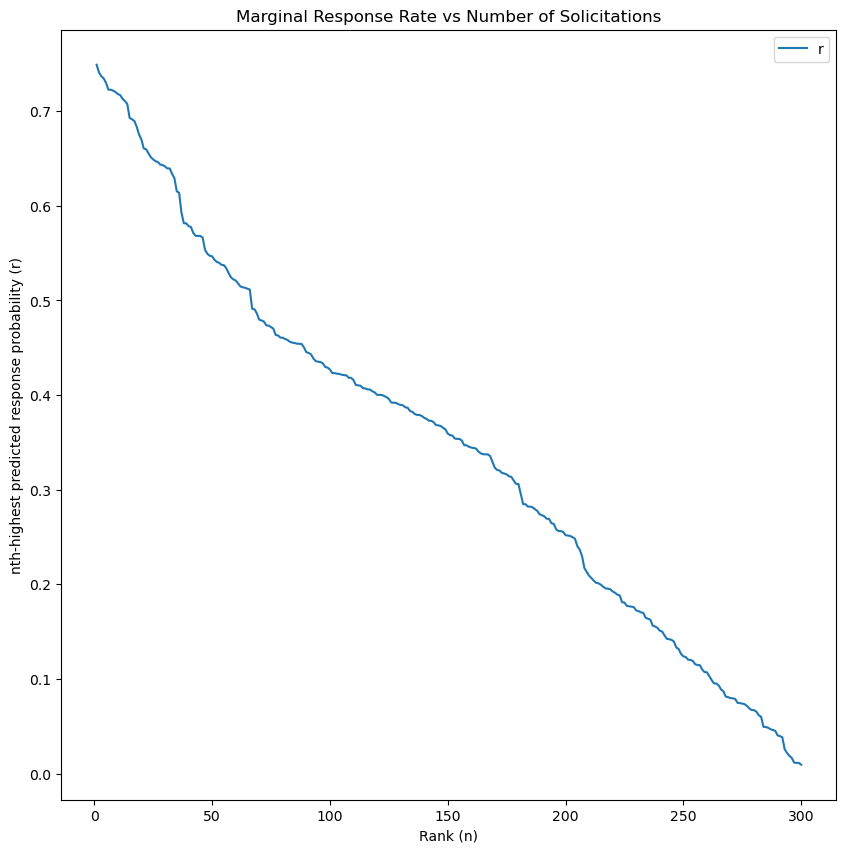

In [39]:
scoring_list['Rank'] = [i+1 for i in range(scoring_list.shape[0])]

# plotting
scoring_list.plot(y = 'r', x='Rank', ylabel='nth-highest predicted response probability (r)', xlabel = 'Rank (n)', 
               title='Marginal Response Rate vs Number of Solicitations',figsize = (10,10))

plt.show()

**Q5. Suppose average LT Customer equity is USD 30, and the solicitation cost is USD 12. Use the
marginal cost rule to calculate how many of the best prospects in the holdout list Melrose
should contact. Hand-in: your calculations and final answer.**

The value of "p" is determined by dividing the solicitation cost by the equity. In this scenario, the solicitation cost is USD 12, and the equity is USD 30. Therefore, "p" must be greater than the quotient of 12 divided by 30, which is greater than 0.4.


$p_n > \frac{solicitation\_cost}{equity}$

$p_n > \frac{12}{30} $

$p_n > 0.4 $

In [41]:
num_prospects = len(scoring_list[scoring_list["r"]>0.4])
print("They should contact", num_prospects, "prospects from the holdout list")

They should contact 122 prospects from the holdout list


**Q6. Compute the cumulative sum (aka running sum) of the predicted response probability
r when the persons are sorted as in Question 3. This cumulative sum at rank n gives
the expected number of conversions or positive responses if the firm were to contact
the n customers with the highest r. Plot the curve of the expected number of positive
responses vs number of solicitations made, like in the chart that appears on slide 33.
You will notice that the curve does not rise as fast as one would expect from the usual
80/20 rule. Explain why the curve might be of this shape here.**

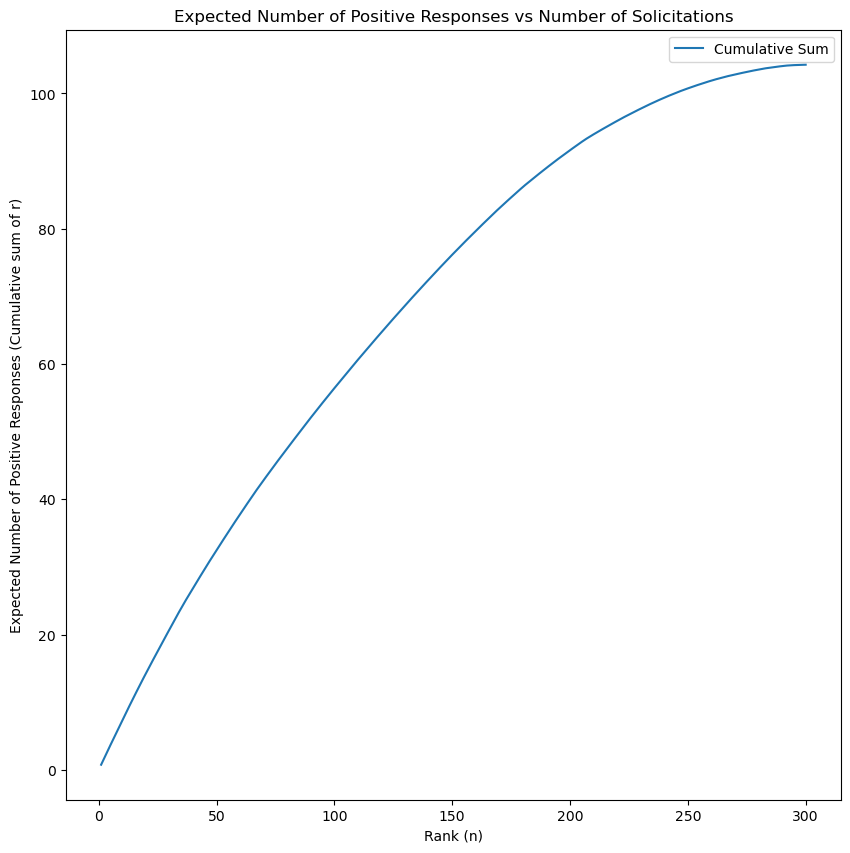

In [43]:
scoring_list['Cumulative Sum'] = scoring_list['r'].cumsum()
scoring_list.plot(y = 'Cumulative Sum', x='Rank', ylabel='Expected Number of Positive Responses (Cumulative sum of r)',
               xlabel= 'Rank (n)', title='Expected Number of Positive Responses vs Number of Solicitations',figsize = (10,10))

plt.show()

In [45]:
top20 = scoring_list[scoring_list["Rank"]<=60]
average_lift = top20['Lift'].mean()
print("The average lift is:", round(average_lift,4))

The average lift is: 1.7501


**Q7. Assume that the firm has enough raw Belgian chocolate to make only 40 boxes of the
pralines offered as part of the introductory offer. Use the limited supply rule to calculate
how many of the best prospects in the holdout list Melrose should send solicitations to.**

In [46]:
best_prospects = scoring_list[scoring_list["Cumulative Sum"]<40]
best_prospects

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,Score,r,Lift,Rank,Cumulative Sum
131,1,317,57,70,63,12,26,0,1.094448,0.749218,2.081162,1,0.749218
243,0,321,57,70,63,0,28,0,1.051670,0.741095,2.058599,2,1.490314
191,0,315,57,70,63,0,0,14,1.030543,0.737021,2.047281,3,2.227335
159,0,311,57,70,63,0,0,0,1.018904,0.734759,2.040997,4,2.962094
19,1,314,57,70,63,0,0,0,0.994297,0.729936,2.027600,5,3.692030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,163,57,70,63,0,0,15,0.084783,0.521183,1.447731,60,37.803171
257,0,129,57,70,63,15,0,0,0.072113,0.518021,1.438946,61,38.321191
55,1,159,57,70,63,0,15,0,0.059755,0.514934,1.430373,62,38.836125
143,0,254,57,60,63,12,13,28,0.055611,0.513899,1.427498,63,39.350024


In [47]:
print("they should contact", len(best_prospects), "prospects in the holdout list given only 40 boxes in hand")

they should contact 64 prospects in the holdout list given only 40 boxes in hand


**Q8. To test how well the scoring model predicts actual performance, Melrose sent the solicitation offer to all 300 persons on the holdout list. The actual response is available as
the y variable in the holdout list data part of the spreadsheet. Compute the cumulative
sum (aka running sum) for this y variable when the persons are sorted as in Question
3. The cumulative sum of y at rank n gives the total actual number of conversions or
positive responses when the firm contacted the n customers with the highest r. Plot this
cumulative sum vs the number of solicitations made. Superimpose on this the curve
obtained in step 6 above to get a chart akin to slide 44 . Based on this chart, comment on
the discrepancies between the actual responses and the predicted response probabilities
for the prospects. Comment also on the consequent impact on the decision made in step
7 above**

In [48]:
sc_list = scoring_list.copy()
sc_list['y'] = holdout_data.loc[sc_list.index, 'y']
sc_list['y Cumulative Sum'] = sc_list['y'].cumsum()

sc_list

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,Score,r,Lift,Rank,Cumulative Sum,y,y Cumulative Sum
131,1,317,57,70,63,12,26,0,1.094448,0.749218,2.081162,1,0.749218,1,1
243,0,321,57,70,63,0,28,0,1.051670,0.741095,2.058599,2,1.490314,0,1
191,0,315,57,70,63,0,0,14,1.030543,0.737021,2.047281,3,2.227335,1,2
159,0,311,57,70,63,0,0,0,1.018904,0.734759,2.040997,4,2.962094,1,3
19,1,314,57,70,63,0,0,0,0.994297,0.729936,2.027600,5,3.692030,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,406,39,0,63,0,26,0,-4.089672,0.016469,0.045747,296,104.195501,0,100
152,0,291,39,10,52,0,0,28,-4.447783,0.011569,0.032136,297,104.207070,0,100
96,0,159,57,15,41,0,26,0,-4.474904,0.011263,0.031286,298,104.218333,0,100
285,1,354,30,10,52,0,0,0,-4.482211,0.011182,0.031061,299,104.229515,0,100


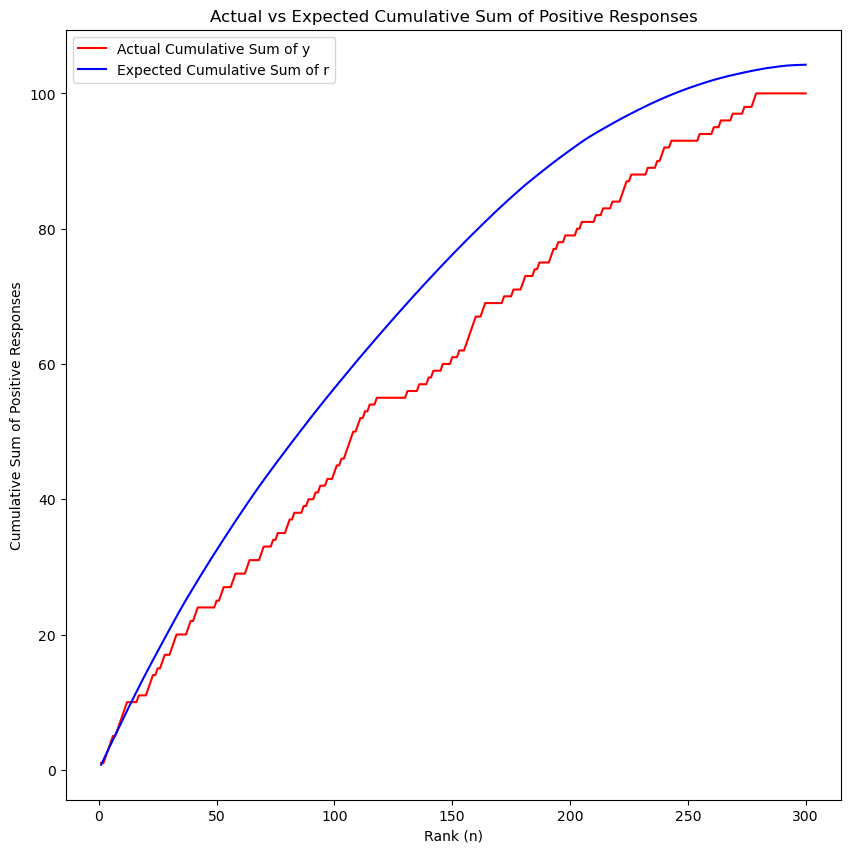

In [53]:
plt.figure(figsize=(10, 10))

plt.plot(sc_list['Rank'], sc_list['y Cumulative Sum'], 'r', label='Actual Cumulative Sum of y')
plt.plot(sc_list['Rank'], sc_list['Cumulative Sum'], 'b', label='Expected Cumulative Sum of r')

plt.xlabel('Rank (n)')
plt.ylabel('Cumulative Sum of Positive Responses')
plt.title('Actual vs Expected Cumulative Sum of Positive Responses')

plt.legend()
plt.show()
